Данный блокнот посвящен получению данных, используя REST API, средствами языка Питон. Также преобразуем полученную информацию в датафрейм (таблицу), а в конце выгрузим результаты в файл формата .csv.

В качестве источника будем использовать сайт https://kinopoiskapiunofficial.tech/. Он стабильней работает, чем  https://www.kinopoisk.ru.

Для удобства необходимо зарегистрироваться на сайте для бесплатного получения API ключа (токена), который расчитан на 500 запросов в день. 

В Питоне даже существуют отдельные библиотеки KinoPoiskAPI, но в данном блокноте они использоваться не будут в целях демонстрации материала в общем виде.

На вкладке "Документация" сайта https://kinopoiskapiunofficial.tech/ существующие сервисы представлены с помощью графического интерфейса Swagger UI(продукт компании SmartBear). Это своего рода "умная" спецификация сервисов, где можно найти всю необходимую информацию о сервисах, методах, схемах, обязательных полях, типах данных и т.п.
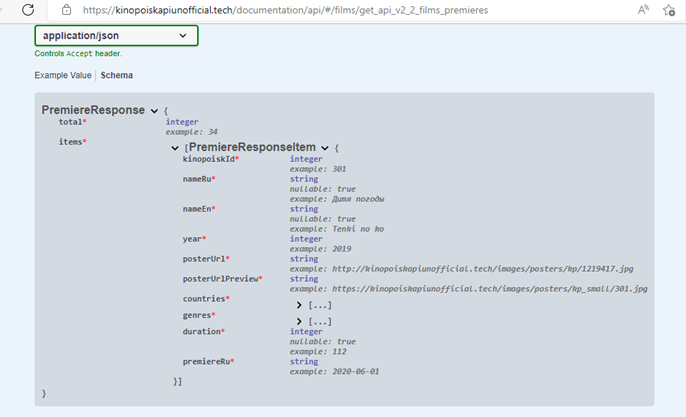

Кроме того, через Swagger UI можно отправлять запросы.

Все имеющиеся тут сервисы поддерживают только метод GET, т.е. получение данных. Другие стандартные методы POST, PUT, HEAD, DELETE также поддерживаются питоном.

Попробуем получить премьеры фильмов за определенный период.

Для начала установим необходимые библиотеки

In [1]:
!pip install xmltodict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import requests
import json
import xmltodict
import pandas as pd

In [3]:
token = '361092b0-aed0-488a-8bd4-bcac462fc9c8' # Токен, используемый в данном блокноте, необходимо заменить на свой.

По-хорошему, токен лучше сохранить в каком-нибудь файле локально и считывать от туда.

In [4]:
url = 'https://kinopoiskapiunofficial.tech/api/v2.2/films/premieres?year=2022&month=AUGUST' #ищем новинки августа 2022 года

In [5]:
r = requests.get(url, headers={'accept': 'application/json', "X-API-KEY": token}) # выполняем запрос

После выполнения запроса ОБЯЗАТЕЛЬНА прверка статуса выполнения оперции. Он стандартно трехзначный. Начинающиеся с "2" означают успешное выполнение (например, 200,  201, 204 и т.д), с "4" - ошибка клиента (например, проблемы с авторизацией, ошибки в json, несуществующие данные и т.п.), с "5" - ошибка сервера, запрос не может быть обработан.


In [6]:
print (r.status_code)

200


In [7]:
print (r.text)

{"total":52,"items":[{"kinopoiskId":1114973,"nameRu":"Большое путешествие","nameEn":"","year":2019,"posterUrl":"https://kinopoiskapiunofficial.tech/images/posters/kp/1114973.jpg","posterUrlPreview":"https://kinopoiskapiunofficial.tech/images/posters/kp_small/1114973.jpg","countries":[{"country":"Россия"},{"country":"США"}],"genres":[{"genre":"мультфильм"},{"genre":"комедия"},{"genre":"приключения"}],"duration":80,"premiereRu":"2022-08-04"},{"kinopoiskId":984204,"nameRu":"Из Неаполя с любовью","nameEn":"Troppo napoletano","year":2016,"posterUrl":"https://kinopoiskapiunofficial.tech/images/posters/kp/984204.jpg","posterUrlPreview":"https://kinopoiskapiunofficial.tech/images/posters/kp_small/984204.jpg","countries":[{"country":"Италия"}],"genres":[{"genre":"комедия"}],"duration":101,"premiereRu":"2022-08-04"},{"kinopoiskId":1111403,"nameRu":"Семейка монстров","nameEn":"Petit vampire","year":2020,"posterUrl":"https://kinopoiskapiunofficial.tech/images/posters/kp/1111403.jpg","posterUrlPrev

In [8]:
result = r.json()  #  получаем представление данных в виде объекта Python

In [9]:
print (result)

{'total': 52, 'items': [{'kinopoiskId': 1114973, 'nameRu': 'Большое путешествие', 'nameEn': '', 'year': 2019, 'posterUrl': 'https://kinopoiskapiunofficial.tech/images/posters/kp/1114973.jpg', 'posterUrlPreview': 'https://kinopoiskapiunofficial.tech/images/posters/kp_small/1114973.jpg', 'countries': [{'country': 'Россия'}, {'country': 'США'}], 'genres': [{'genre': 'мультфильм'}, {'genre': 'комедия'}, {'genre': 'приключения'}], 'duration': 80, 'premiereRu': '2022-08-04'}, {'kinopoiskId': 984204, 'nameRu': 'Из Неаполя с любовью', 'nameEn': 'Troppo napoletano', 'year': 2016, 'posterUrl': 'https://kinopoiskapiunofficial.tech/images/posters/kp/984204.jpg', 'posterUrlPreview': 'https://kinopoiskapiunofficial.tech/images/posters/kp_small/984204.jpg', 'countries': [{'country': 'Италия'}], 'genres': [{'genre': 'комедия'}], 'duration': 101, 'premiereRu': '2022-08-04'}, {'kinopoiskId': 1111403, 'nameRu': 'Семейка монстров', 'nameEn': 'Petit vampire', 'year': 2020, 'posterUrl': 'https://kinopoiskap

Создадим датафрейм (таблицу) из полученного ответа:

In [10]:
df = pd.json_normalize(result['items'])
df.sample(2)

,kinopoiskId,nameRu,nameEn,year,posterUrl,posterUrlPreview,countries,genres,duration,premiereRu
17,4309991,Форсаж. Китайский дрифт,Chi zha feng yun,2021,https://kinopoiskapiunofficial.tech/images/pos...,https://kinopoiskapiunofficial.tech/images/pos...,[{'country': 'Тайвань'}],"[{'genre': 'спорт'}, {'genre': 'драма'}]",105,2022-08-11
5,1332073,Проклятие матери: Прятки на выживание,Motherly,2021,https://kinopoiskapiunofficial.tech/images/pos...,https://kinopoiskapiunofficial.tech/images/pos...,[{'country': 'Канада'}],"[{'genre': 'ужасы'}, {'genre': 'триллер'}]",80,2022-08-04


Оставим только несколько колонок:

In [11]:
df = df.drop(columns=['posterUrl', 'posterUrlPreview','countries','genres','duration','premiereRu']) 

Добавим индексацию по полю "kinopoiskId":

In [12]:
df = df.set_index('kinopoiskId')
df.sample(2)

,nameRu,nameEn,year
kinopoiskId,,,
5066711,Маленький принц,,2022
1111403,Семейка монстров,Petit vampire,2020


А теперь добавим в наш датафрейм новую колонку, в которой для каждого фильма найдем рейтинг. Рейтинг будем получать с сайта https://www.kinopoisk.ru/ для каждого kinopoiskId (способ получения уже рассматривался ранее):

In [14]:
from tqdm.notebook import tqdm
for i in tqdm(df.index):
  url1 ='https://rating.kinopoisk.ru/' + str(i) + '.xml'
  r1 = requests.get(url1)
  rating = xmltodict.parse(r1.content)['rating']['kp_rating']['#text']
  df.loc[i,['rating']] = rating
df.head()

  0%|          | 0/52 [00:00<?, ?it/s]

,nameRu,nameEn,year,rating
kinopoiskId,,,,
1114973,Большое путешествие,,2019,6.23
984204,Из Неаполя с любовью,Troppo napoletano,2016,6.498
1111403,Семейка монстров,Petit vampire,2020,6.302
4910311,Земля. Перезагрузка,Chong qi di qiu,2021,4.73
4413227,Убойный монтаж,Coupé,2022,7.364


Отсортируем по рейтингу:

In [15]:
df = df.sort_values(by='rating', ascending=False)
df.head()

,nameRu,nameEn,year,rating
kinopoiskId,,,,
1209780,Маугли дикой планеты,Terra Willy: Planète inconnue,2019,7.979
3670,The Doors,The Doors,1991,7.706
4862812,Икар,Icare,2022,7.6
41047,Ширли-мырли,,1995,7.485
818981,Реальные упыри,What We Do in the Shadows,2014,7.452


А теперь воспользуемся сервисом https://tastedive.com/, который по названию фильма подбирает подобные. Подберем по одному такому "similar" для имеющихся с рейтингом > 7, например, и добавим название в соответсвующую колонку. Сервис работает только с английскими названиями.

In [18]:
df['rating'] = df['rating'].astype('float') # меняем тип данных для возможности последующего выбора (с рейтингом > 7)
df.shape

(52, 4)

In [27]:
# Отбираем фильмы по рейтингу > 7, имеющие название на английском
df_sample = df[(df['rating'] > 7) & (df['nameEn'] != '')].copy()
df_sample.shape

(8, 4)

In [38]:
url_new = 'https://tastedive.com/api/similar?limit=1&type=movies&q='
for i in tqdm(df_sample.index):
  r_new = requests.get(url_new + df_sample.loc[i,'nameEn']).json()
  if r_new['Similar']['Results'] != []:
    df_sample.loc[i,'similar'] = r_new['Similar']['Results'][0]['Name']
df_sample

  0%|          | 0/8 [00:00<?, ?it/s]

,nameRu,nameEn,year,rating,similar
kinopoiskId,,,,,
1209780,Маугли дикой планеты,Terra Willy: Planète inconnue,2019,7.979,NaN
3670,The Doors,The Doors,1991,7.706,Natural Born Killers
4862812,Икар,Icare,2022,7.600,NaN
818981,Реальные упыри,What We Do in the Shadows,2014,7.452,What We Do In The Shadows: Interviews With Som...
4413227,Убойный монтаж,Coupé,2022,7.364,NaN
4401506,Великий «Юнайтед»,The United Way,2021,7.068,NaN
4929765,История кино: Новое поколение,The Story of Film: A New Generation,2021,7.044,NaN
4720113,Все ненавидят Йохана,Alle hater Johan,2022,7.023,NaN


Сохраним получившийся датафрейм как .csv файл.

In [25]:
df_sample.to_csv('movies.csv',encoding='utf-16')

In [ ]:
%%shell
jupyter nbconvert --to html /content/sample_data/API_DF.ipynb
